## Loan Approval Prediction - Exploratory Data Analysis (EDA)

### Objective
This notebook aims to explore the factors that influence loan approval decisions using the Loan Prediction dataset. By analyzing demographic, financial, and credit-related features, we seek to uncover patterns that can assist financial institutions in improving their loan eligibility assessments.

---

### Business Context
Banks receive thousands of loan applications daily. A well-structured EDA can help:
- Understand key trends in applicant profiles
- Identify factors affecting loan approval
- Improve pre-screening processes for faster decisions

The insights gained here will support a machine learning model and business dashboards in subsequent stages.



### Step 1: Import libraries & Dataset

In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setup Styling
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load dataset
df = pd.read_csv('../data/raw/loandataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



#### Dataset Overview
The dataset contains 614 observations and several features such as:

- Applicant demographics (Gender, Marital Status, Dependents, etc.)
- Financial attributes (Income, Loan Amount, Credit History)
- Loan application status (Approved or Not)

We'll explore these to find meaningful patterns that influence loan decisions.


In [3]:
# Check Missing values
df.info()
df.isnull().sum().sort_values(ascending= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

#### Insight 
Several columns contain missing values that need to be handled carefully:

- Credit_History: 50 missing
- Self_Employed: 32 missing
- LoanAmount: 22 missing
- Loan_Amount_Term: 14 missing
- Gender: 13 missing
- Dependents: 15 missing
- Married: 3 missing

We'll use domain knowledge and data distribution to impute values appropriately.

In [4]:
# Impute Credit_History with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

# Impute Self_Employed with mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Median imputation grouped by Education and Self_Employed
df['LoanAmount'] = df.groupby(['Education','Self_Employed'])['LoanAmount'].transform(
    lambda x: x.fillna(x.median())
)

# Impute Loan_Amount_Term with mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

# Impute Dependents with mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

# Impute Married with mode
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

# Imputer Gender with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
    

### Step 2: Univariate Analysis

Let's explore the individual features to understand their distributions and identify any potential issues like skewness or outliers.


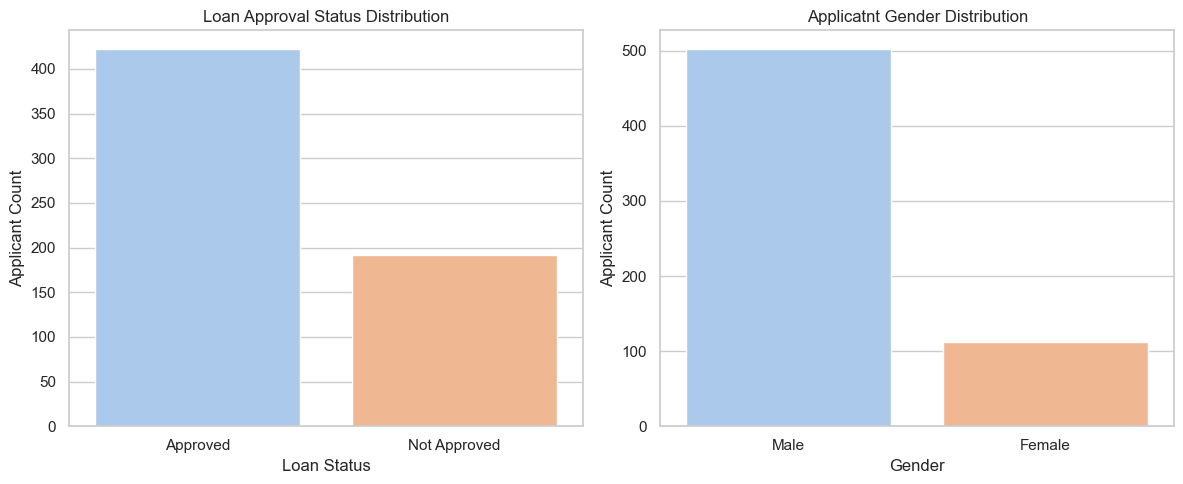

In [5]:
# Loan Approval Status Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Loan_Status', data =df, palette='pastel')
plt.title('Loan Approval Status Distribution')
plt.xlabel("Loan Status")
plt.ylabel("Applicant Count")
plt.xticks(['Y','N'],['Approved','Not Approved'])


# Gender Distribution 

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data= df, palette='pastel')
plt.title('Applicatnt Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Applicant Count')

plt.tight_layout()
plt.show()

- The majority of applicants **(~69%)** received loan approval (Y), while the rest were denied (N). This mild imbalance should be noted for model evaluation.
- A significant portion of applicants are **male** , which might be driven by cultural and financial roles in families.

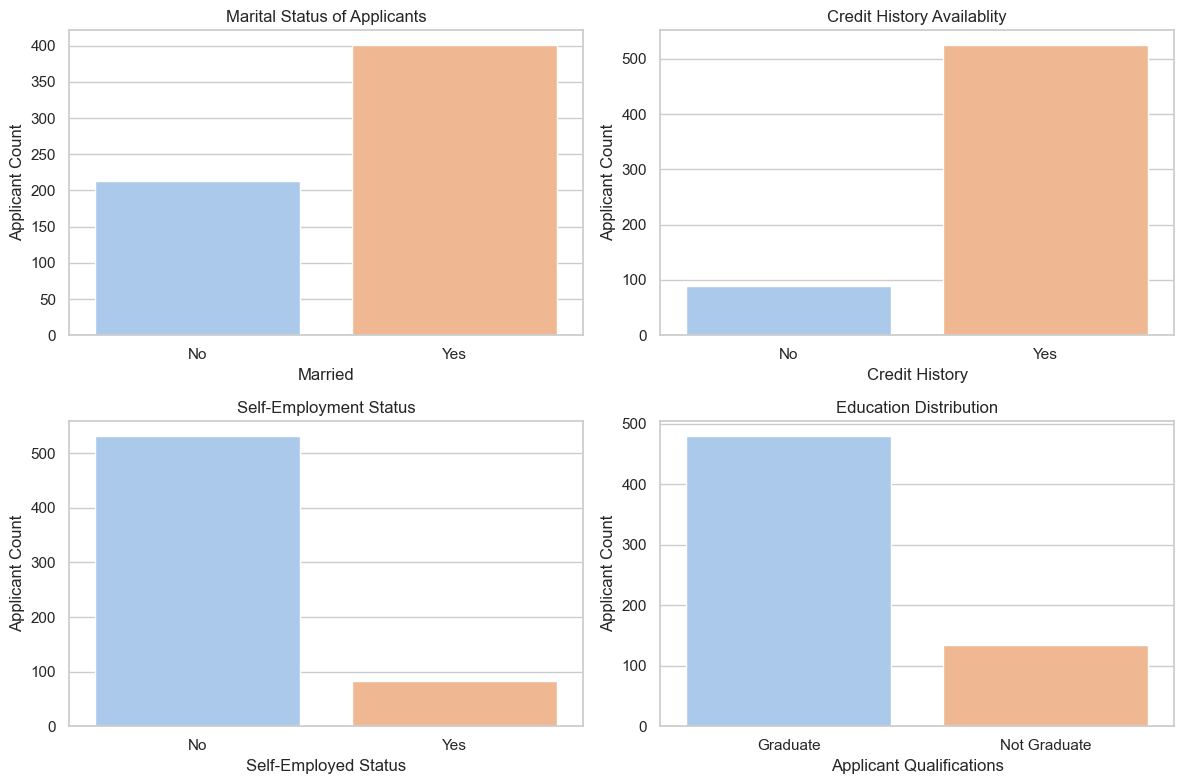

In [6]:
plt.figure(figsize=(12,8))

# Marital Status Distribution

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Married', palette='pastel')
plt.title('Marital Status of Applicants')
plt.ylabel('Applicant Count')
plt.xlabel('Married')

# Credit History Distribution distribution

plt.subplot(2,2,2)
sns.countplot(data=df, x='Credit_History', palette='pastel')
plt.title('Credit History Availablity')
plt.ylabel('Applicant Count')
plt.xlabel('Credit History')
plt.xticks([0,1], ['No','Yes'])

# Self Employed Distribution 

plt.subplot(2,2,3)
sns.countplot(data=df, x='Self_Employed', palette='pastel')
plt.title('Self-Employment Status')
plt.ylabel('Applicant Count')
plt.xlabel('Self-Employed Status')

plt.subplot(2,2,4)
sns.countplot(data=df, x='Education', palette='pastel')
plt.title('Education Distribution')
plt.ylabel('Applicant Count')
plt.xlabel('Applicant Qualifications')

plt.tight_layout()
plt.show()

- Most loan applicants are **married**, which might imply dual-income households and better repayments capacity.
- Most applicants are **salaried**. Lenders might consider salaired joibs more stable comporaed to self-employment.
- A large number of applicants have a **credit history**. This is a key factor for trust in loan approval.
- A majority of applicants are **graduates**, indicating a relatively well-educated applicant base.

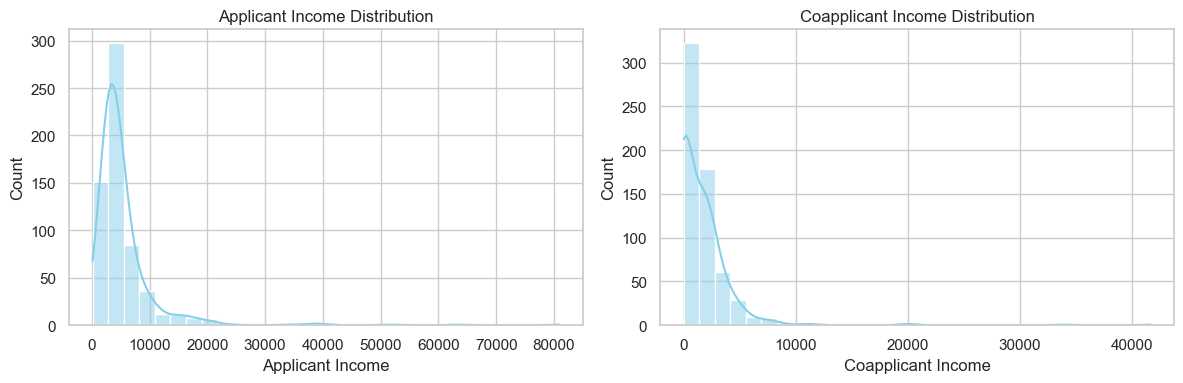

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['ApplicantIncome'],bins=30, kde=True, color='skyblue')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')

plt.subplot(1,2,2)
sns.histplot(df['CoapplicantIncome'],bins=30, kde=True, color='skyblue')
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')

plt.tight_layout()
plt.show()


- The distribution of **ApplicantIncome is right-skewed**, with most applicants earning below ₹10,000. A few outliers with very high incomes stretch the tail. This indicates income inequality among applicants.

- **CoapplicantIncome also shows a right-skewed distribution**, with many entries around ₹0, indicating several applicants apply without co-borrowers. A small portion of coapplicants contribute significantly to total income, potentially boosting loan eligibility.

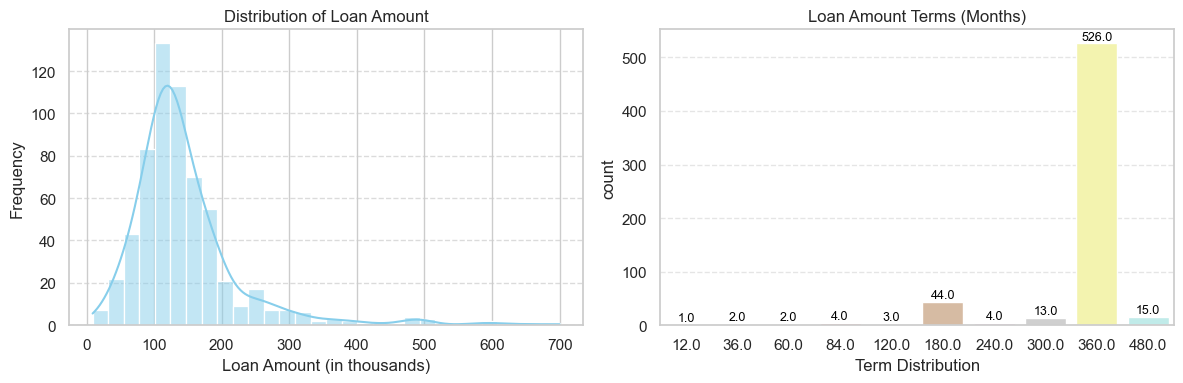

In [8]:
# Loan Amount Distribution
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='LoanAmount', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
ax=sns.countplot(data=df, x='Loan_Amount_Term', palette='pastel')
plt.title('Loan Amount Terms (Months)')
plt.xlabel('Term Distribution')
plt.ylabel('count')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add Data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',fontsize=9, color='black', xytext=(0,5),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

- The loan amounts are **right-skewed**, with a majority of loans under ₹200,000. A few high-value loans act as outliers, and a log transformation may help normalize this for ML models.
- Most applicants choose the default term of **360 months (30 years)**. Shorter terms are rare and may correspond to specific loan types or borrower profiles.


### Step 3: Bivariate Analysis

Here we explore how key variables affect loan approval (`Loan_Status`). This gives business insights into applicant profiles that are more likely to be approved.


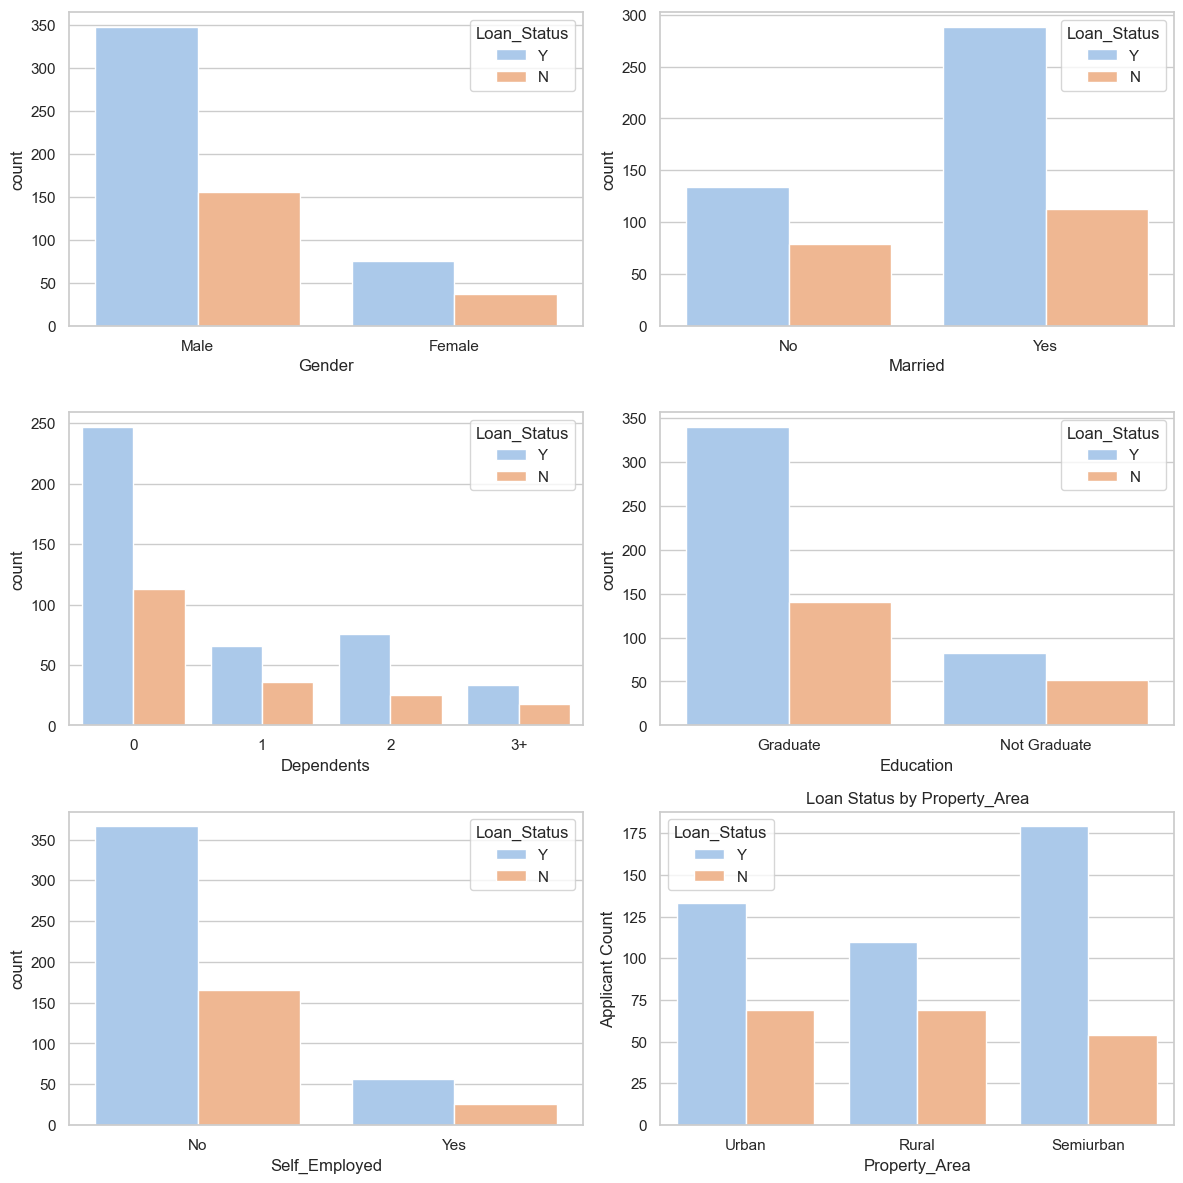

In [9]:
# Bivariate Analysis 
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data = df, ax = axes[i], palette='pastel', hue='Loan_Status')
    plt.title(f'Loan Status by {col}')
    plt.ylabel('Applicant Count')


plt.tight_layout()
plt.show()

-  Both graduates and non-graduates get loans, but **gradutates** have slightly higher approval rates.
- Applicants with 0 dependents have the **highest approval rate**, suggesting financial independence may increase chances of approval. Approval probability tends to decrease slightly as the number of dependents increases, likely due to higher perceived financial burden.

- Applicants from **semiurban areas** have the **highest loan approval rates**, potentially due to better income-to-loan ratios or favorable lending policies. Urban and rural areas show comparatively **lower approval rates**, indicating a need for tailored credit evaluation in these zones.

- **Salaried individuals** have a **notably higher approval rate** than self-employed applicants. This reflects banks' preference for stable, verifiable incomes. Self-employed applicants may face stricter scrutiny unless supported by strong credit history.

- **Married applicants** slightly edge out single applicants in terms of approval, possibly due to dual-income assumptions. However, the difference isn't large, indicating marriage is not a strong standalone predictor for loan approval.

- **Male applicants** constitute the majority of loan applications and show a slightly higher loan approval rate. However, the difference in approval rates between **male and female applicants is marginal**, suggesting that gender alone is not a significant factor influencing loan decisions. Other variables such as credit history and income play a more decisive role.


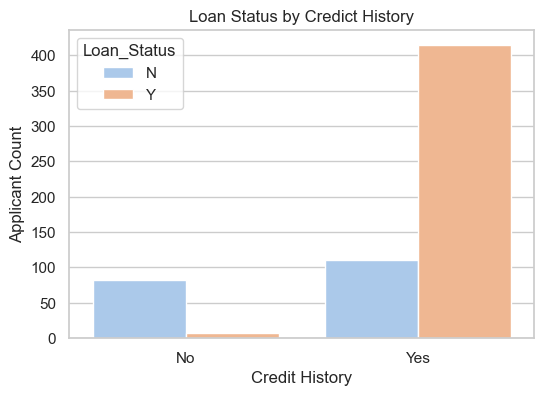

In [10]:
# Analysis of Loan_Status by Credit_History

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', palette='pastel')
plt.xlabel('Credit History')
plt.ylabel('Applicant Count')
plt.title('Loan Status by Credict History')
plt.xticks([0,1],['No','Yes'])

plt.show()

- **Credit history is the most influential feature** in loan approval. Applicants with a **credit history** have a **significantly higher approval rate** compared to those without it. This aligns with standard banking practices, as a strong repayment record greatly boosts lender confidence. Applicants with **no or poor credit history** face much lower chances of approval.


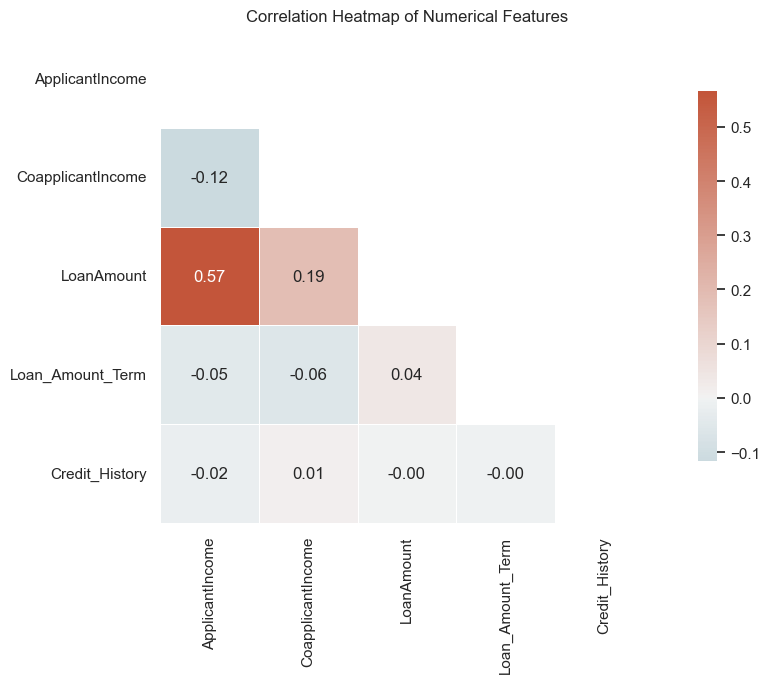

In [11]:
# Select numerical columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Create a mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(10,7))
sns.set_theme(style='white')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap= True)

# Draw the heatmap
sns.heatmap(corr, mask = mask, cmap=cmap, annot= True, fmt='.2f', center=0, square=True, linewidth=0.5,
            cbar_kws={'shrink':0.75})

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

> The heatmap shows that:
- `ApplicantIncome` and `LoanAmount` are moderately correlated.
- Most other features are weakly correlated, supporting the need for non-linear models or feature engineering.


### Final Summary of Insights

| Feature            | Key Insight |
|--------------------|-------------|
| Gender             | Male applicants dominate, but approval rate differences are minor. |
| Married            | Married individuals form the majority and tend to have higher approval rates. |
| Education          | Graduates are more frequent loan seekers. |
| Self_Employed      | Fewer applicants, and slightly lower approval odds. |
| Credit_History     | Strongest predictor — applicants with credit history (1) are far more likely to get approved. |
| LoanAmount         | Positively skewed — smaller loans are more common and more frequently approved. |
| Loan_Amount_Term   | 360 months is the dominant choice — others are outliers. |

These insights will guide feature engineering and modeling in the next phase.
